<a href="https://colab.research.google.com/github/sudeepthi2204/ML-PROJECT/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from  google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iidt/supermarket_sales - Sheet1.csv')

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['gross income'], bins=10,color='purple')  # Adjust the number of bins as needed
plt.xlabel('Gross Income')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Income')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import the colormap module

rating_counts = data['Rating'].value_counts().sort_index()
cmap = cm.get_cmap('viridis')  # Choose a colormap (e.g., 'viridis')
colors = [cmap(i / len(rating_counts)) for i in range(len(rating_counts))]  # Generate colors based on number of ratings
plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.xlabel('Rating')
plt.ylabel('Product line')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# Check the available columns in your DataFrame
print(data.columns)

# Assuming the correct column name is 'Date', try:
data['Date'].dtype

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


dtype('O')

In [ ]:
# Check the available columns in your DataFrame to find the correct name
print(data.columns)

# Assuming the correct column name is 'Date', try:
type(data['Date'])

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


pandas.core.series.Series

In [ ]:
def parse_dates(date_str):
    formats = ['%m/%d/%Y', '%d-%m-%Y']  # Add other formats if necessary
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

data['Date'] = data['Date'].apply(parse_dates)


In [ ]:
data['day'] = (data['Date']).dt.day
data['month'] = (data['Date']).dt.month
data['year'] = (data['Date']).dt.year

In [ ]:
data['Time'] = pd.to_datetime(data['Time'])

In [ ]:
data['Hour'] = (data['Time']).dt.hour

In [ ]:
data['Hour'].nunique()

11

In [ ]:
data['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int32)

In [ ]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-04-07 12:30:14.400000,2024-07-26 15:24:41.880000,307.58738,4.761905,15.379369,6.97270,13.466000,3.783000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2024-07-26 10:00:00,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-31 00:00:00,2024-07-26 12:43:00,118.49750,4.761905,5.924875,5.50000,2.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-03-13 00:00:00,2024-07-26 15:19:00,241.76000,4.761905,12.088000,7.00000,15.000000,3.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-05-03 00:00:00,2024-07-26 18:15:00,448.90500,4.761905,22.445250,8.50000,23.000000,5.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-12-03 00:00:00,2024-07-26 20:59:00,993.00000,4.761905,49.650000,10.00000,31.000000,12.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,0.000000,11.708825,1.71858,10.367368,3.147669,0.0,3.186857


In [ ]:
categorical_columns = [cname for cname in data.columns if data[cname].dtype == "object"]

In [ ]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [ ]:
print("# unique values in Branch: {0}".format(len(data['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(data['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(data['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(data['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(data['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(data['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


Mean Squared Error: 20.356160820451848
R^2 Score: 0.9095281741313251


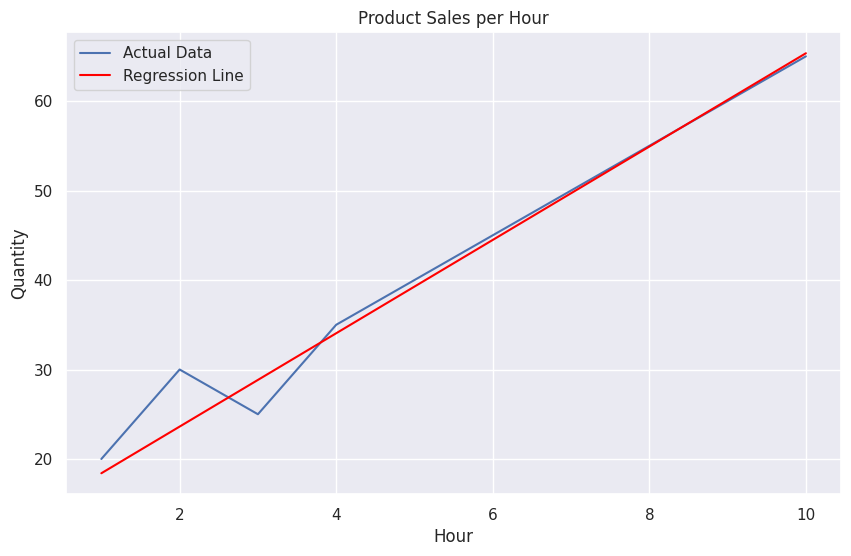

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example DataFrame (replace this with your actual data loading code)
data = pd.DataFrame({
    'Hour': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Quantity': [20, 30, 25, 35, 40, 45, 50, 55, 60, 65]
})

# Define features (X) and target (y)
X = data[['Hour']]  # Feature(s)
y = data['Quantity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot the actual data
sns.lineplot(x='Hour', y='Quantity', data=data, label='Actual Data')

# Plot the regression line
# Generate a range of hours for plotting the regression line
hour_range = pd.DataFrame({'Hour': range(min(data['Hour']), max(data['Hour']) + 1)})
regression_line = model.predict(hour_range)
plt.plot(hour_range, regression_line, color='red', label='Regression Line')

# Customize the plot
plt.title('Product Sales per Hour')
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.legend()

# Show the plot
plt.show()


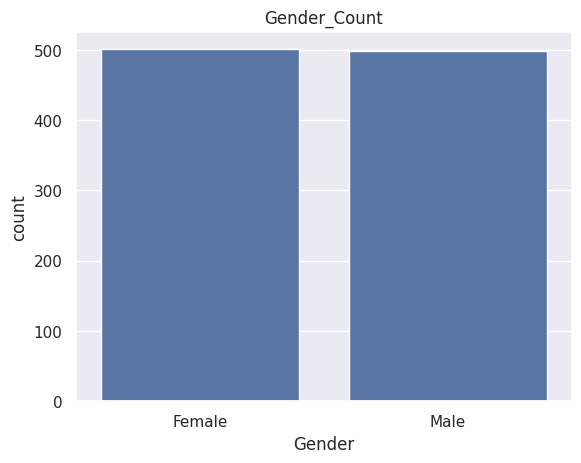

In [ ]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =data).set_title("Gender_Count")

Text(0.5, 1.0, 'Ratings by Branch')

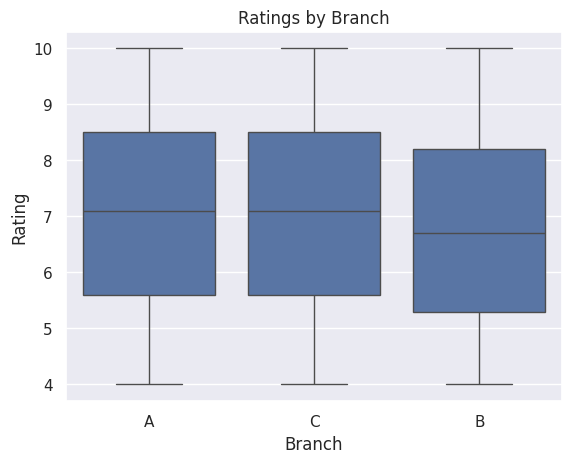

In [ ]:
 sns.boxplot(x="Branch", y = "Rating" ,data =data).set_title("Ratings by Branch")

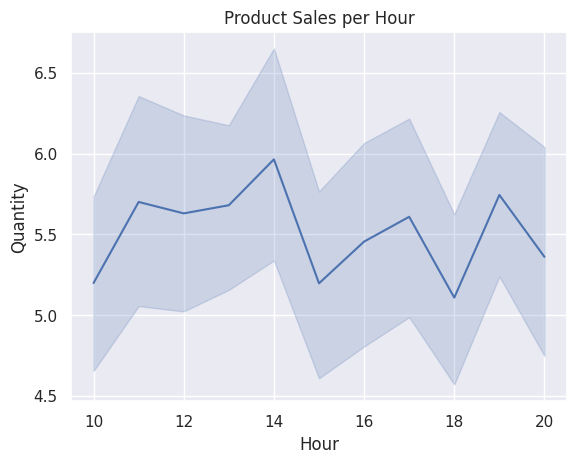

In [ ]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =data).set_title("Product Sales per Hour")

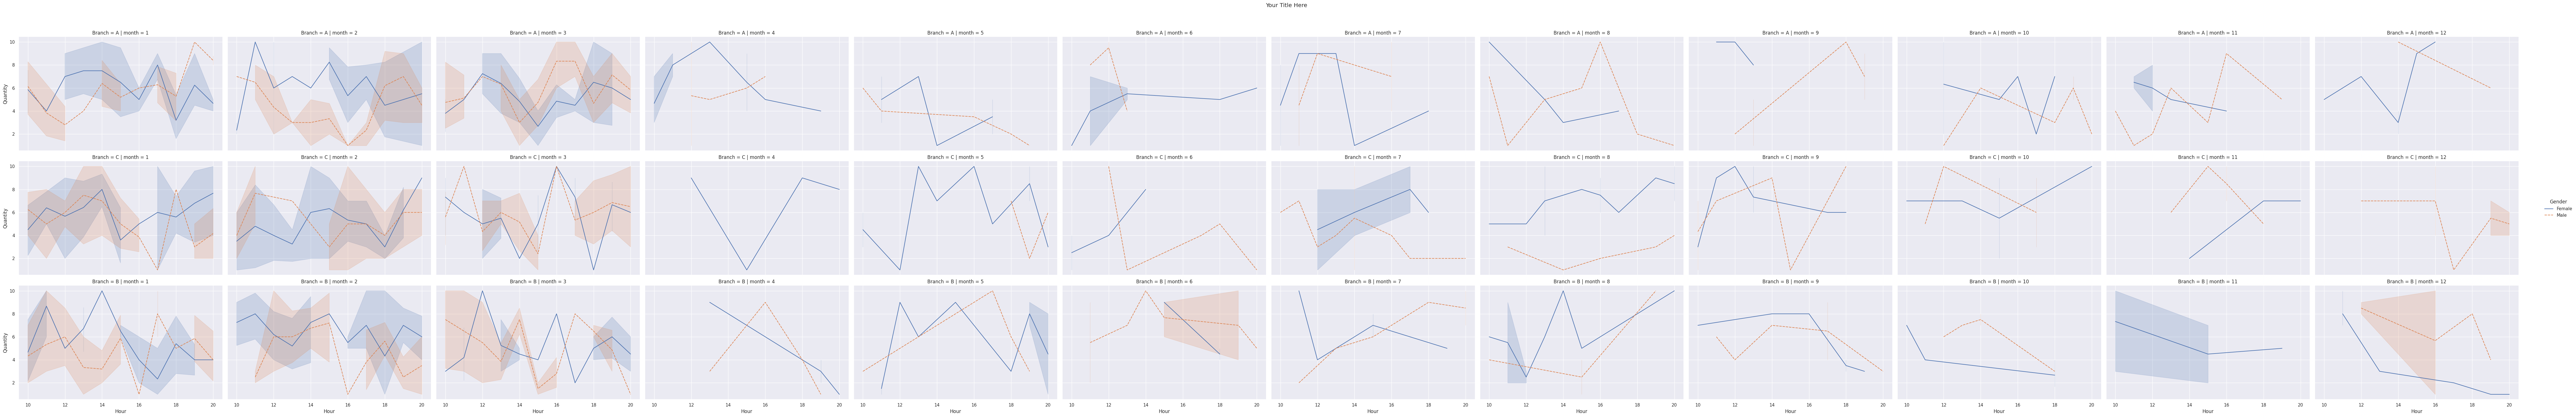

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot with increased size
genderCount = sns.relplot(
    x="Hour",
    y='Quantity',
    col='month',
    row='Branch',
    kind="line",
    hue="Gender",
    style="Gender",
    data=data,
    height=5,    # Height of each facet
    aspect=1.5    # Aspect ratio (width/height)
)

# Optionally, you can adjust the overall figure size
plt.subplots_adjust(top=0.9)  # Adjust the space at the top to accommodate titles
genderCount.fig.suptitle('Your Title Here')  # Set a title for the entire plot

plt.show()


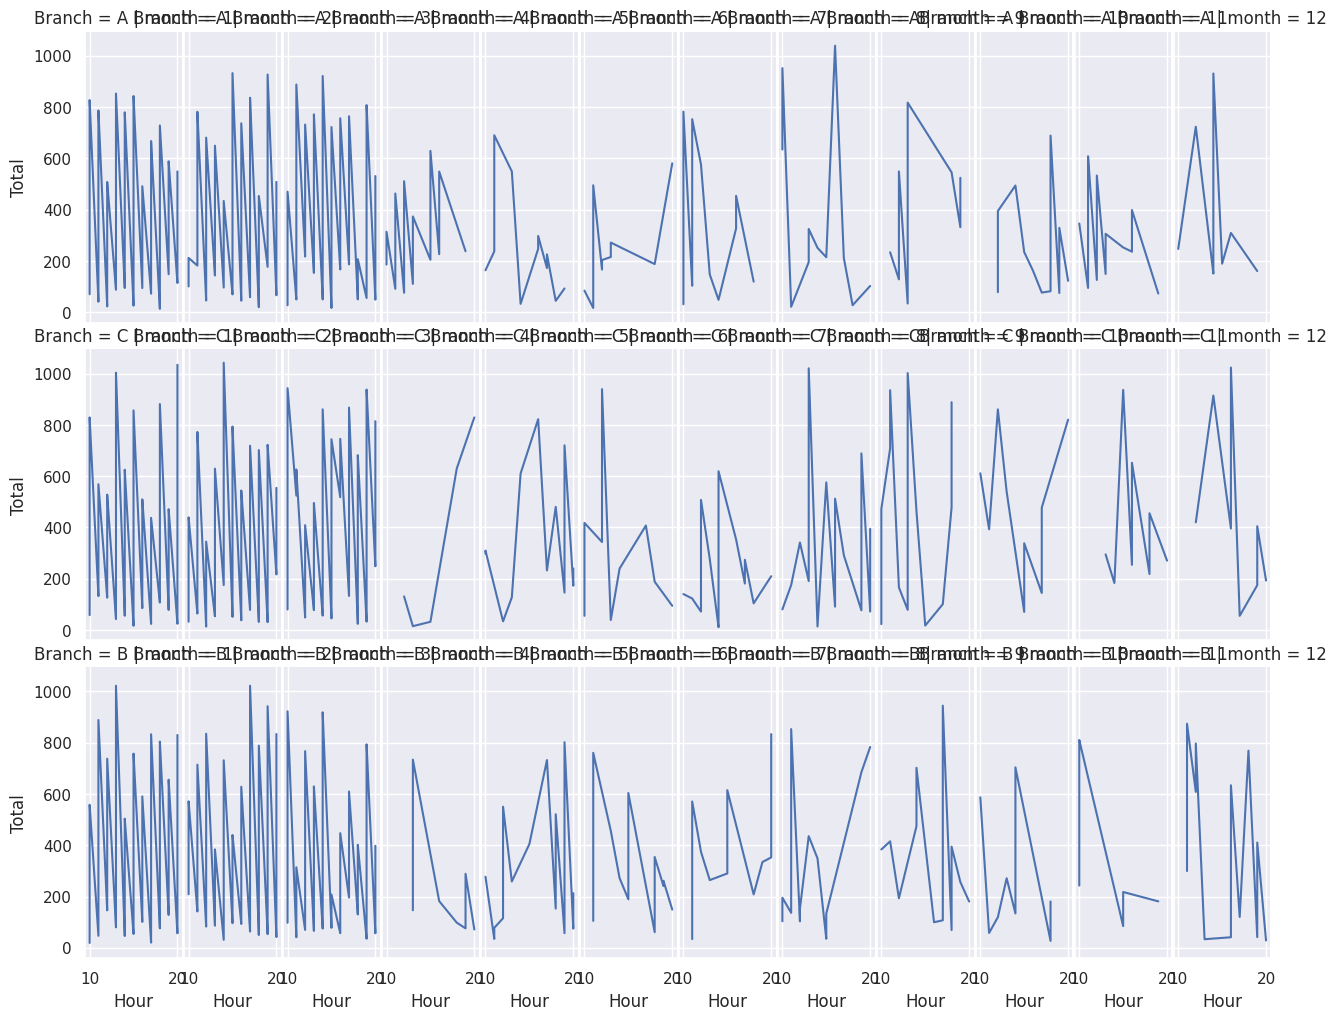

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the size by setting height and aspect
genderCount = sns.relplot(
    x="Hour",
    y="Total",
    col="month",
    row="Branch",
    estimator=None,
    kind="line",
    data=data,
    height=5,    # Height of each facet in inches
    aspect=1.5    # Aspect ratio (width/height)
)

# Optional: Adjust the overall size of the figure
genderCount.fig.set_size_inches(12, 10)  # Width and height in inches

plt.show()


In [ ]:
data['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

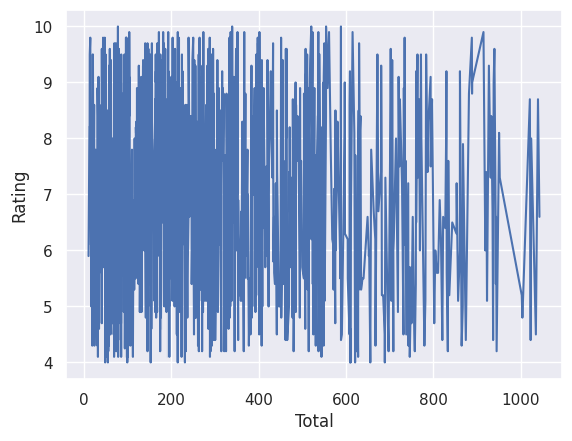

In [ ]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =data)

<Axes: xlabel='Quantity', ylabel='Product line'>

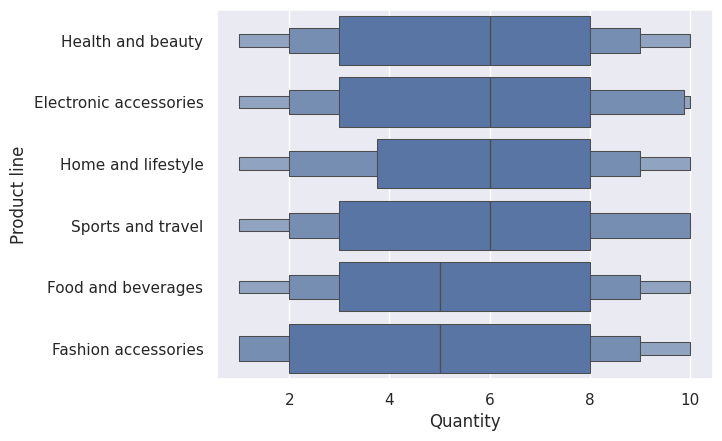

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=data )

<Axes: xlabel='count', ylabel='Product line'>

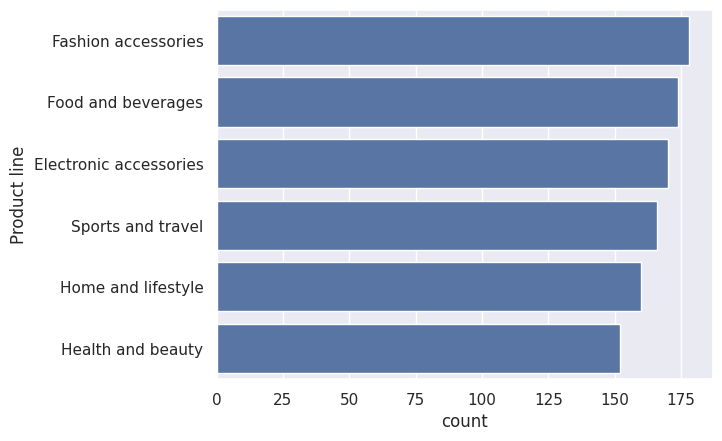

In [ ]:
sns.countplot(y = 'Product line', data=data, order = data['Product line'].value_counts().index )

<Axes: xlabel='Total', ylabel='Product line'>

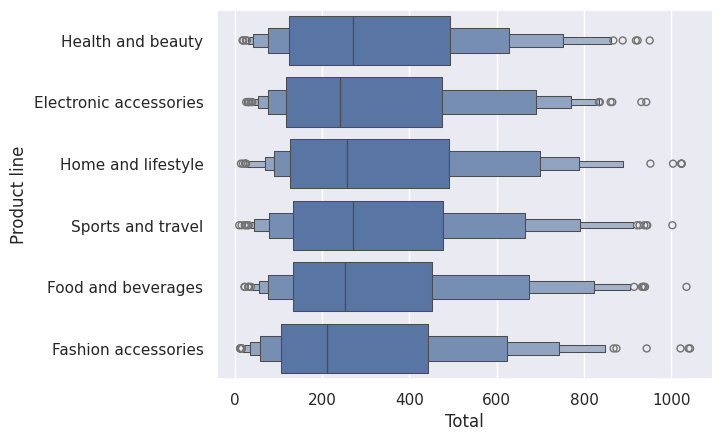

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Total', data=data)

<Axes: xlabel='Total', ylabel='Product line'>

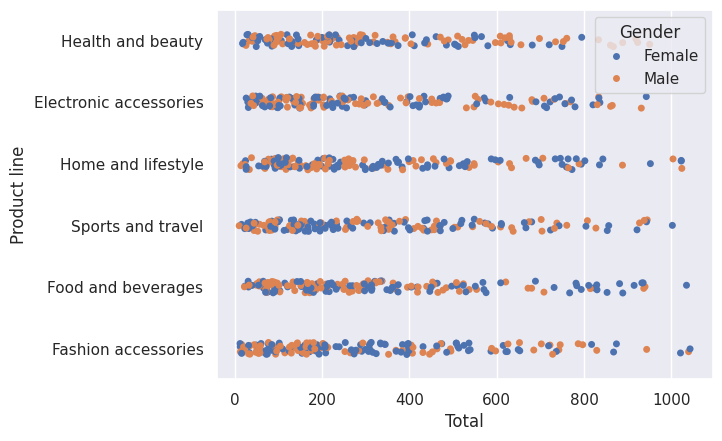

In [ ]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=data )

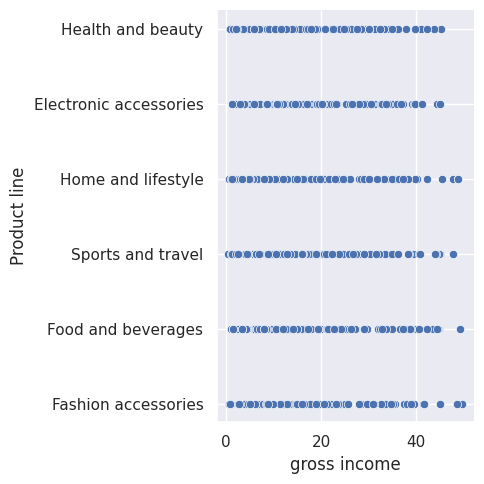

In [ ]:
sns.relplot(y = 'Product line', x = 'gross income', data=data )

<Axes: xlabel='Rating', ylabel='Product line'>

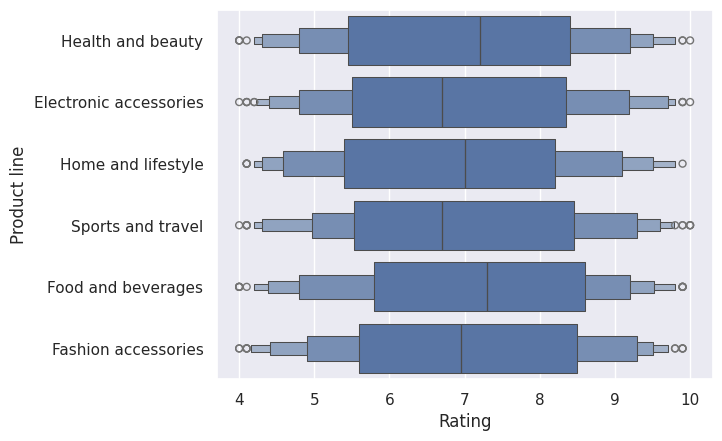

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=data)

In [ ]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }

# Iterate directly over the 'City' column of your DataFrame
for city in data['City']:
    data['long'] = data['City'].map(long)
    data['lat'] = data['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

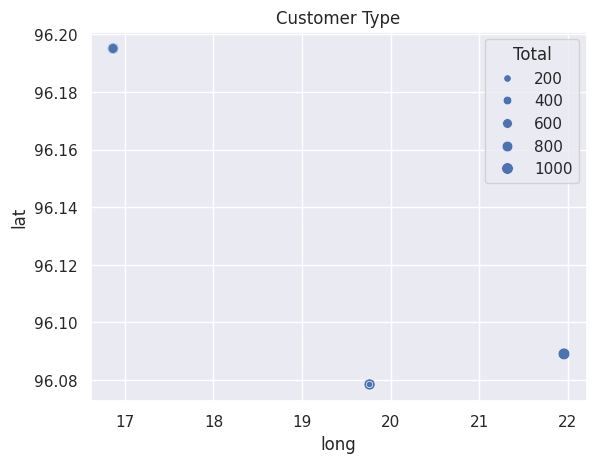

In [ ]:
 sns.scatterplot(x="long",  y = "lat",size = "Total", data =data, legend = "brief").set_title("Customer Type")

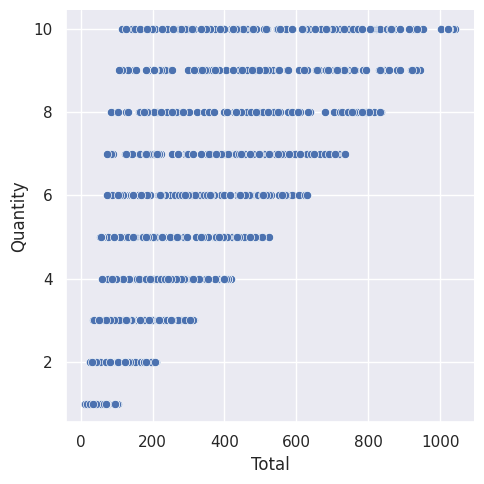

In [ ]:
 sns.relplot(x="Total",  y = "Quantity", data =data)

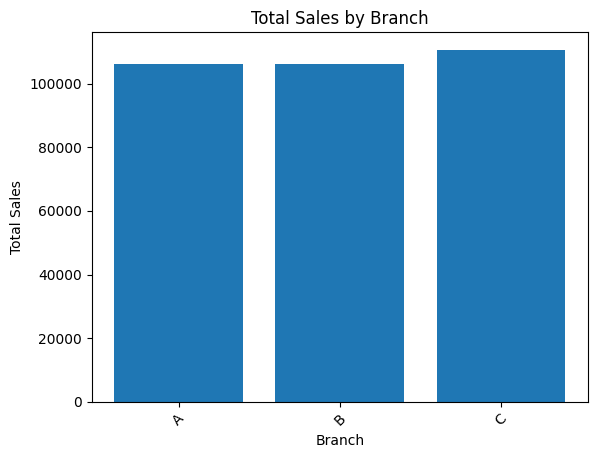

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate total sales per branch
branch_totals = data.groupby('Branch')['Total'].sum()

# Create the bar graph
plt.bar(branch_totals.index, branch_totals.values)
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Total Sales by Branch')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

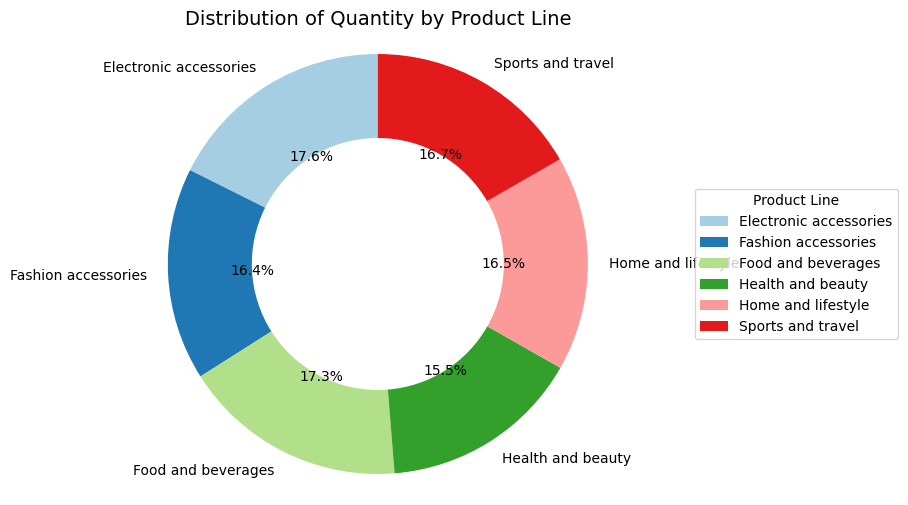

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate total quantity for each product line
product_quantity = data.groupby('Product line')['Quantity'].sum()

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(product_quantity, labels=product_quantity.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Paired(range(len(product_quantity))), wedgeprops=dict(width=0.4),
        textprops={'fontsize': 10})

plt.title('Distribution of Quantity by Product Line', fontsize=14)
plt.legend(title='Product Line', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

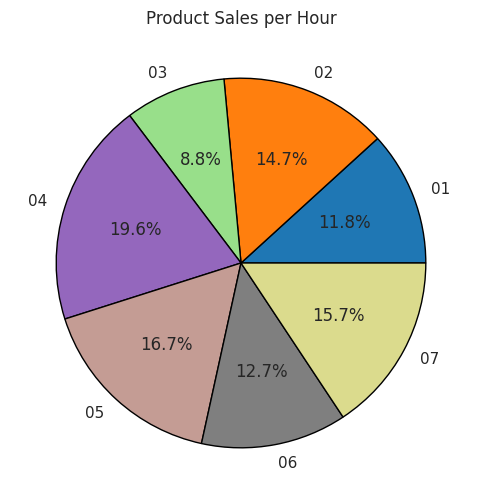

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample data (Replace this with your actual data)
data = pd.DataFrame({
    'Hour': ['01', '02', '03', '04', '05', '06', '07'],
    'Quantity': [120, 150, 90, 200, 170, 130, 160]
})

# Aggregate data (in case it needs aggregation; here it's already aggregated)
aggregated_data = data.groupby('Hour').sum().reset_index()

# Use a vibrant colormap from matplotlib
cmap = plt.get_cmap('tab20')  # 'tab20' provides a range of vibrant colors

# Create a color list based on the colormap
colors = [cmap(i / len(aggregated_data)) for i in range(len(aggregated_data))]

# Create the pie chart with reduced size
plt.figure(figsize=(6, 6))  # Adjust the figsize to reduce the size of the pie chart
plt.pie(
    aggregated_data['Quantity'],
    labels=aggregated_data['Hour'],
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops=dict(edgecolor='black')  # Optional: add a black border to each slice
)

# Add title
plt.title('Product Sales per Hour')

# Show the plot
plt.show()


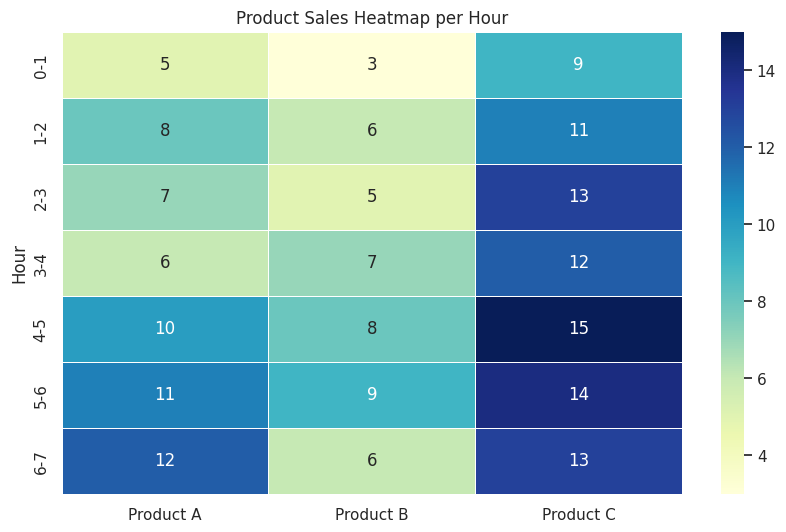

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data: Creating a DataFrame for the heatmap
data = pd.DataFrame({
    'Hour': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7'],
    'Product A': [5, 8, 7, 6, 10, 11, 12],
    'Product B': [3, 6, 5, 7, 8, 9, 6],
    'Product C': [9, 11, 13, 12, 15, 14, 13]
})

# Set 'Hour' as the index
data.set_index('Hour', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, cmap='YlGnBu', linewidths=.5)

# Add a title
plt.title('Product Sales Heatmap per Hour')

# Show the plot
plt.show()
